<a href="https://colab.research.google.com/github/mohameddhameem/LearnPyTorch/blob/master/Hello_Neural_Network_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solve XOR with Neural Network PyTorch 

First lets try a single perceptron and see that we can't train a model that can represent XOR. 

In [0]:
from tqdm import tqdm
from IPython.display import clear_output
import torch
from torch import nn
from torch.autograd import Variable
from torch import FloatTensor
from torch import optim
use_cuda = torch.cuda.is_available() # if you are running in Colab - enable GPU : Runtime > Change Runtime type

In [0]:
use_cuda

True

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(15, 10)})

In [0]:
xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
xor_output = np.array([[0,1,1,0]]).T
print("Input X", xor_input)
print("Output Y", xor_output)

Input X [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Output Y [[0]
 [1]
 [1]
 [0]]


In [0]:
device = 'cuda' if torch.cuda.is_available()  else 'cpu'
# Converting the X to PyTorch-able data structure.
X_pt = torch.tensor(xor_input).float()
X_pt = X_pt.to(device)
# Converting the Y to PyTorch-able data structure.
Y_pt = torch.tensor(xor_output, requires_grad=False).float()
Y_pt = Y_pt.to(device)
print(X_pt)
print(X_pt.device)
print(Y_pt)
print(Y_pt.device)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], device='cuda:0')
cuda:0
tensor([[0.],
        [1.],
        [1.],
        [0.]], device='cuda:0')
cuda:0


In [0]:
# Use tensor.shape to get the shape of the matrix/tensor.
num_data, input_dim = X_pt.shape
print('Inputs Dim:', input_dim)

num_data, output_dim = Y_pt.shape
print('Output Dim:', output_dim)

Inputs Dim: 2
Output Dim: 1


In [0]:
# Use Sequential to define a simple feed-forward network.
model = nn.Sequential(
            nn.Linear(input_dim, output_dim), # Use nn.Linear to get our simple perceptron
            nn.Sigmoid()                      # Use nn.Sigmoid to get our sigmoid non-linearity
        )
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [0]:
# Remember we define as: cost = truth - predicted
# If we take the absolute of cost, i.e.: cost = |truth - predicted|
# we get the L1 loss function. 
criterion = nn.L1Loss() 
learning_rate = 0.03

In [0]:
# The simple weights/parameters update processes we did before
# is call the gradient descent. SGD is the sochastic variant of
# gradient descent. 
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

(**Note**: Personal Learning, I strongely encourage you to go through the [University of Washington course of machine learning regression](https://www.coursera.org/learn/ml-regression) to better understand the fundamentals of (i) ***gradient***, (ii) ***loss*** and (iii) ***optimizer***. But given that you know how to code it, the process of more complex variants of gradient/loss computation and optimizer's step is easy to grasp)

# Training a PyTorch model

To train a model using PyTorch, we simply iterate through the no. of epochs and imperatively state the computations we want to perform. 

## Remember the steps?

 1. Initialize 
 2. Forward Propagation
 3. Backward Propagation
 4. Update Optimizer

In [0]:
num_epochs = 100000
# Step 1: Initialization. 
# Note: When using PyTorch a lot of the manual weights
#       initialization is done automatically when we define
#       the model (aka architecture)
model = nn.Sequential(
            nn.Linear(input_dim, output_dim), 
            nn.Sigmoid()).to(device)
criterion = nn.MSELoss() 
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

losses = []

for i in tqdm(range(num_epochs)):
    # Reset the gradient after every epoch. 
    optimizer.zero_grad() 
    # Step 2: Foward Propagation
    predictions = model(X_pt).to(device)
    
    # Step 3: Back Propagation 
    # Calculate the cost between the predictions and the truth.
    loss_this_epoch = criterion(predictions, Y_pt)
    # Note: The neat thing about PyTorch is it does the 
    #       auto-gradient computation, no more manually defining
    #       derivative of functions and manually propagating
    #       the errors layer by layer.
    loss_this_epoch.backward()
    
    # Step 4: Optimizer take a step. 
    # Note: Previously, we have to manually update the 
    #       weights of each layer individually according to the
    #       learning rate and the layer delta. 
    #       PyTorch does that automatically =)
    optimizer.step()
    
    # Log the loss value as we proceed through the epochs.
    losses.append(loss_this_epoch.data.item())

100%|██████████| 100000/100000 [00:52<00:00, 1915.87it/s]


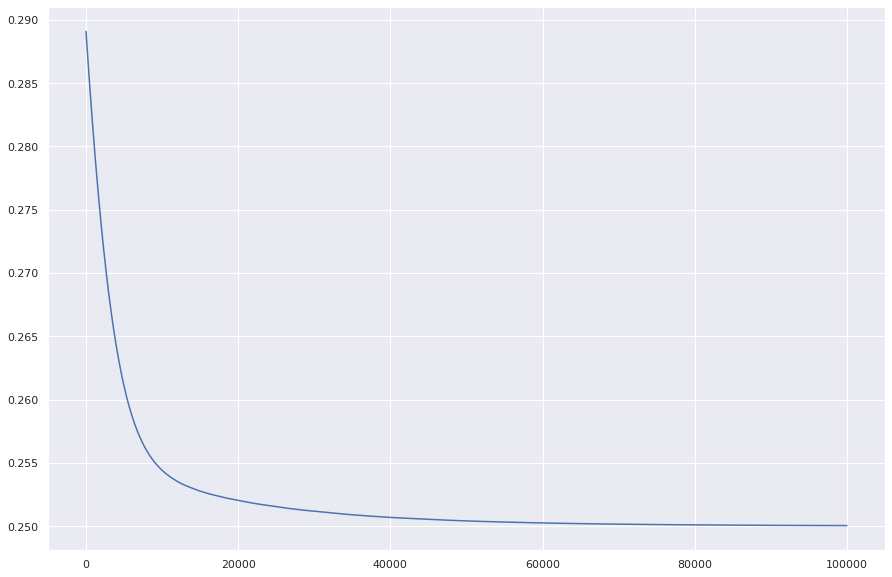

In [0]:
# Visualize the losses
plt.plot(losses)
plt.show()
#Adjust the Learning rate and Epoch to see the difference in the graph

In [0]:
for _x, _y in zip(X_pt, Y_pt):
    prediction = model(_x)
    print('Input:\t', list(map(int, _x)))
    print('Pred:\t', int(prediction))
    print('Ouput:\t', int(_y))
    print('######')

Input:	 [0, 0]
Pred:	 0
Ouput:	 0
######
Input:	 [0, 1]
Pred:	 0
Ouput:	 1
######
Input:	 [1, 0]
Pred:	 0
Ouput:	 1
######
Input:	 [1, 1]
Pred:	 0
Ouput:	 0
######


Now, try again with 2 layers using PyTorch
====


  1%|▏         | 130/10000 [00:00<00:07, 1299.40it/s]

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
)



100%|██████████| 10000/10000 [00:07<00:00, 1337.60it/s]

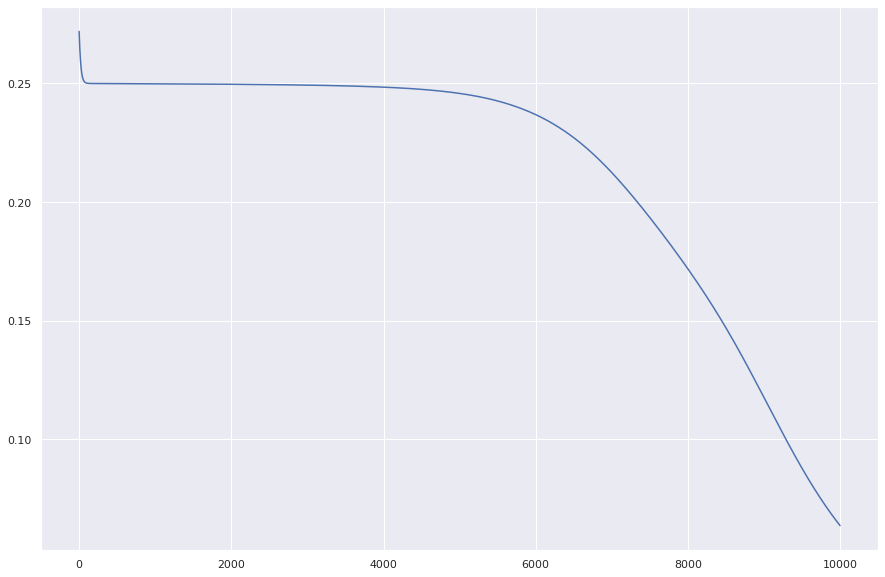

CPU times: user 7.08 s, sys: 369 ms, total: 7.45 s
Wall time: 7.81 s


In [0]:
%%time

hidden_dim = 5
num_data, input_dim = X_pt.shape
num_data, output_dim = Y_pt.shape

model_2layers = nn.Sequential(nn.Linear(input_dim, hidden_dim),
                      nn.Sigmoid(), 
                      nn.Linear(hidden_dim, output_dim),
                      nn.Sigmoid()).to(device)
print(model_2layers)
criterion = nn.MSELoss()
learning_rate = 0.1
optimizer = optim.SGD(model_2layers.parameters(), lr=learning_rate)
num_epochs = 10000

losses = []

for _ in tqdm(range(num_epochs)):
    optimizer.zero_grad()
    predictions = model_2layers(X_pt).to(device)
    loss_this_epoch = criterion(predictions, Y_pt)
    loss_this_epoch.backward()
    optimizer.step()
    losses.append(loss_this_epoch.data.item())
    #print([float(_pred) for _pred in predictions], list(map(int, Y_pt)), loss_this_epoch.data[0])
    
# Visualize the losses
plt.plot(losses)
plt.show()

In [0]:
for _x, _y in zip(X_pt, Y_pt):
    prediction = model_2layers(_x)
    print('Input:\t', list(map(int, _x)))
    print('Pred:\t', int(prediction > 0.5))
    print('Ouput:\t', int(_y))
    print('######')

Input:	 [0, 0]
Pred:	 0
Ouput:	 0
######
Input:	 [0, 1]
Pred:	 1
Ouput:	 1
######
Input:	 [1, 0]
Pred:	 1
Ouput:	 1
######
Input:	 [1, 1]
Pred:	 0
Ouput:	 0
######


In [0]:
##All Looks Good .. Lets try next

MNIST: The "Hello World" of Neural Nets
====

Like any deep learning class, we ***must*** do the MNIST. 

The MNIST dataset is 

 - is made up of handwritten digits 
 - 60,000 examples training set
 - 10,000 examples test set

In [0]:
from torchvision import datasets, transforms
import numpy as np

In [0]:
mnist_train = datasets.MNIST('./data', train=True, download=True, 
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))
                             ]))

mnist_test = datasets.MNIST('./data', train=False, download=True, 
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))
                             ]))

In [0]:
# Visualization Candies
import matplotlib.pyplot as plt

def show_image(mnist_x_vector, mnist_y_vector):
    pixels = mnist_x_vector.reshape((28, 28))
    label = np.where(mnist_y_vector == 1)[0]
    plt.title('Label is {}'.format(label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

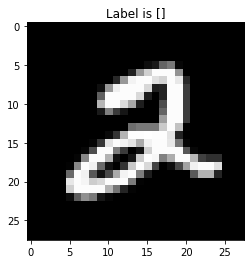

In [4]:
# Fifth image and label.
show_image(mnist_train.data[5], mnist_train.targets[5])

# Lets apply what we learn about multi-layered perceptron with PyTorch and apply it to the MNIST data. 

In [0]:
X_mnist = mnist_train.data.float()
Y_mnist = mnist_train.targets.float()

X_mnist_test = mnist_test.data.float()
Y_mnist_test = mnist_test.targets.float()

In [14]:
#Total records
Y_mnist.shape

torch.Size([60000])

In [15]:
# Use FloatTensor.shape to get the shape of the matrix/tensor.
num_data, *input_dim = X_mnist.shape
print('No. of images:', num_data)
print('Inputs Dim:', input_dim)

num_data, *output_dim = Y_mnist.shape
num_test_data, *output_dim = Y_mnist_test.shape
print('Output Dim:', output_dim)

No. of images: 60000
Inputs Dim: [28, 28]
Output Dim: []


In [0]:
device = 'cuda' if torch.cuda.is_available()  else 'cpu'
# Flatten the dimensions of the images.
X_mnist = mnist_train.data.float().view(num_data, -1).to(device)
Y_mnist = mnist_train.targets.float().unsqueeze(1).to(device)

X_mnist_test = mnist_test.data.float().view(num_test_data, -1).to(device)
Y_mnist_test = mnist_test.targets.float().unsqueeze(1).to(device)

In [17]:
# Use FloatTensor.shape to get the shape of the matrix/tensor.
num_data, *input_dim = X_mnist.shape
print('No. of images:', num_data)
print('Inputs Dim:', input_dim)

num_data, *output_dim = Y_mnist.shape
num_test_data, *output_dim = Y_mnist_test.shape
print('Output Dim:', output_dim)

No. of images: 60000
Inputs Dim: [784]
Output Dim: [1]


100%|██████████| 100000/100000 [01:44<00:00, 953.06it/s]


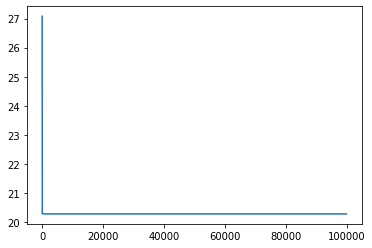

CPU times: user 1min 17s, sys: 25 s, total: 1min 42s
Wall time: 1min 45s


In [19]:
%%time
hidden_dim = 10

model = nn.Sequential(nn.Linear(input_dim[0], 1),  # or we can give as 784,1
                      nn.Sigmoid()).to(device)

criterion = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
num_epochs = 100000


losses = []
plt.ion()

for _e in tqdm(range(num_epochs)):
    optimizer.zero_grad()
    predictions = model(X_mnist).to(device)
    loss_this_epoch = criterion(predictions,Y_mnist)
    loss_this_epoch.backward()
    optimizer.step()
    ##print([float(_pred) for _pred in predictions], list(map(int, Y_pt)), loss_this_epoch.data[0])
    losses.append(loss_this_epoch.data.item())

    #clear_output(wait=True)
    #plt.plot(losses)
    #plt.pause(0.05)

# Visualize the losses
plt.plot(losses)
plt.show()

In [27]:
predictions = model(X_mnist_test).cpu().data.numpy().argmax()
predictions

0

In [28]:
pred = np.array([np.argmax(_p) for _p in predictions.data.numpy()])
pred

AttributeError: ignored

In [29]:
truth = np.array([np.argmax(_p) for _p in Y_mnist_test.data.numpy()])
truth

TypeError: ignored

In [23]:
(pred == truth).sum() / len(pred)

NameError: ignored